### Student Details

Student Name: **Siddharth Prince**

Student ID: **23052058**


# Task 2: scikit learn

In [1]:
# import dependencies
import numpy as np

1.	Read the iris dataset using Pandas (ref Option 2 above)
2.	Extract the Iris-setosa and Iris-verginica samples only
3.	Extract the petal length and petal width. These shall be our features.

In [2]:
import pandas as pd
df = pd.read_csv('./DataSets/iris_data.csv', header=0)

################################
# Your code here
y = df.iloc[np.r_[0:50, 100:], 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[np.r_[0:50, 100:], [0,2]].values

4.	Plot the dataset as a scatter plot with the two Iris types shown as different colours

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


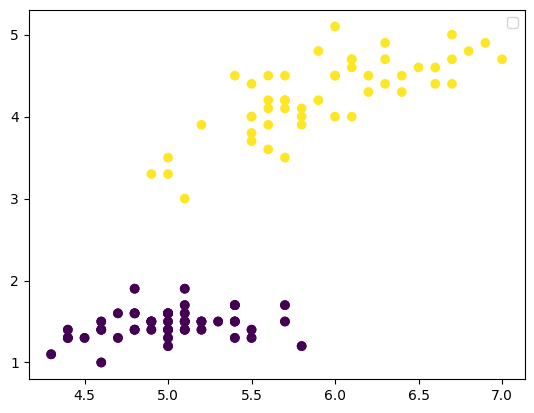

In [3]:
################################
# Your code here
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
plt.scatter(X[:,0], X[:,1],c=y);
plt.legend()
# print(df.loc[np.r_[0:50, 100:150], 4])
# sns.scatterplot(x=df.loc[np.r_[0:50, 100:], 0:1], y=df.loc[np.r_[0:50, 100:], 1:2], hue=df.loc[np.r_[0:50, 100:], 4:], data=df)
# df.head(150)

5.	Use the perceptron in sklearn.linear_model to train on the Iris data previously used. Set verbose = 1; have a look at the epochs, it converges very quickly?

In [4]:
# Splitting to train and test data
from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [5]:
# So as not to confuse with our previously defined Perceptron class
from sklearn.linear_model import Perceptron as Perceptron 

################################
# Your code here
perceptron_model = Perceptron(max_iter=50, verbose=1)
perceptron_model.fit(X_train, y_train)

perceptron_pred = perceptron_model.predict(X_test)

-- Epoch 1
Norm: 12.05, NNZs: 2, Bias: -2.000000, T: 100, Avg. loss: 1.562900
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 12.05, NNZs: 2, Bias: -2.000000, T: 200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 12.05, NNZs: 2, Bias: -2.000000, T: 300, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 12.05, NNZs: 2, Bias: -2.000000, T: 400, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 12.05, NNZs: 2, Bias: -2.000000, T: 500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 12.05, NNZs: 2, Bias: -2.000000, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 12.05, NNZs: 2, Bias: -2.000000, T: 700, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Yes, from the above output, the Perceptron model converges in 7 epochs. Seems to be having 100% accuracy as well judging from the avg loss going down to 0. Checking below.

In [6]:
from sklearn.metrics import accuracy_score

prediction = perceptron_model.predict(X_test)
print(prediction)
# Getting the accuracy score of the model based on the number of correct predictions the model made.
print(f'Accuracy: {accuracy_score(y_test, prediction)*100:.2f}%') 

[-1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1
 -1  1]
Accuracy: 100.00%


Yeah, **100% accuracy!**

6.	Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case

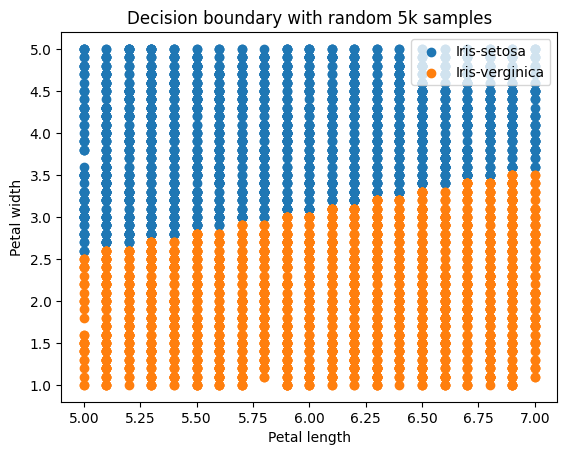

In [19]:
import random

################################
# Your code here

petalLengths = [round(np.random.uniform(5, 7), 1) for i in range(5000)]
petalWidths = [round(np.random.uniform(1, 5), 1) for i in range(5000)]
inputs = np.column_stack((petalLengths, petalWidths))
randomLabels = perceptron_model.predict(inputs)

plt.scatter(inputs[randomLabels==1][:, 0], inputs[randomLabels==1][:, 1], label="Iris-setosa")
plt.scatter(inputs[randomLabels==-1][:, 0], inputs[randomLabels==-1][:, 1], label="Iris-verginica")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Decision boundary with random 5k samples')
plt.legend()
plt.show()

# Task 3: Similarities and differences between artifical and biological neurons
Biological neurons are very complex and are still not fully understood by us. Artificial neurons currently aim to mimic the observed behaviours of these biological neurons on a very rudimentary level. The idea is that if we can work out ways to artificially mimic the working of a human brain as closely as possible, we'd be able to achieve a far greater level of computation than currently possible. Our human brain is a very efficient logical machine that can perform many computations and tasks that often require logic, reasoning and creativity. Combine this capability with the computing prowess of modern hardware and we might all be in trouble from a SkyNet attack (kidding). Since the artificial "neurons" that we use in neural networks are modelled based on our observations of the human brain, there are some definite similarities to them while there are still some aspects of our brain we are yet to fully crack/implement in the sense of an artificial neural network.

## Similarities
- The brain cell operates by collecting signals (short electrical pulse) and then releasing its own signal (pulse) to other adjacent neurons. Artificial neurons like the perceptron model also works similarly where it "fires" or doesn't based on the inputs that it receives. When mutliple of these artificial neurons are chained in a network arranged in layers such that the output values of a neuron is fed as the input to another neuron in the next layer we get an artificial **Neural Network**. A neural network with many layers (hidden) inbetween its input and output layers is called a **Deep Neural Network**.
- There are also two types of neurons in the brain that serve different purposes. **Exitatory neurons** are those that will ensure the signal is passed on to the next neuron while **inhibitory neurons** are those that inhibit the transmission of signals to nearby neurons. These distinctions in its functions may be why there are specific patterns in which the network of neurons in the brain fires based on the current task the brain is focused on. In artificial neural networks however, there aren't any direct distinctions among the neurons and each can output negative and positive values. This is determined by the weights that correspond to each input to the neuron. The signals are multiplied by this and then it will send the output to the next neuron accordingly. So a negative weight means lower output value and vice-versa.

## Differences
- A big difference between the neural networks of our brains and artificial neural networks is that we are able to hold memories as a result of certain neurons firing in patterns. It isn't the same when it comes to computers. Memory is accessed separately via drives and while SSDs have become blazing fast, it still is a disadvantage when compared to how the brain works.
  - An interesting thought along this line is that maybe over the many years of evolution, our brains are tuned to have some inate pre-disposed patterns of neurons firing right from birth which maybe why somethings are very easy for a child to learn without requiring much "data". So in a way when we start training an NN, we are performing the process of evolution from scratch? What if we could start training a fresh NN with pre-trained optimal weights for a previous run? This could help reduce the need for large amounts of data over time.
  - Also, currently we train NNs for specific tasks while the brain can work on any general task/problem given to it.
- A second big difference is that artificial neural networks require a lot more power to run, especcially the big ones when compared to the fact that our brain functions with billions of neurons with a combined energy consumption estimated to be about just [13 watts](https://www.scientificamerican.com/article/thinking-hard-calories/).
  - It is also hard to build in "intuition" to the neural network when it doesn't come with any previous knowledge/context/understanding. The humongously large amounts of data required to make LLM models like ChatGPT exist today is in itself a big disadvantage if we compare being able to replicate human like learning capabilities.
 
## Conclusion
There is lots more to explore and unravel when it comes to the human mind. Using what we know about it as a model to create our most cutting edge technologies of today is promising. The below referenced papaer also goes discusses about maybe implementing biological neuron like exclusive inhibitor and exitatory neurons in artificial neural networks which might yeild exciting results as well once we have hardware to mimic this behaviour. In short, what a time to be alive and to be researching AI and ML! 

Main reading reference: [Towards Data Science | Deep Learning Neurons versus Biological Neurons](https://towardsdatascience.com/deep-learning-versus-biological-neurons-floating-point-numbers-spikes-and-neurotransmitters-6eebfa3390e9)